In [ ]:
#A1
import pandas as pd
import numpy as np

def load_purchase_data(file_path):
    data_frame = pd.read_excel(file_path,sheet_name="Purchase data")
    return data_frame

def create_matrices(data_frame):
    x = data_frame[[ 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = data_frame['Payment (Rs)'].values
    return x,y

def calculate_rank(x):
    rank = np.linalg.matrix_rank(x)
    return rank

def calculating_cost_of_vector(x,y):
    x_pseudo_inverse = np.linalg.pinv(x)
    cost_vector = x_pseudo_inverse.dot(y)
    return cost_vector

def classification_of_customers(y):
    labels = []
    for amount in y:
        if amount > 200:
            labels.append("RICH")
        else:
            labels.append("POOR")
    return labels

def main():
    file_path = "Lab Session Data.xlsx"
    purchase_data = load_purchase_data(file_path)
    x,y = create_matrices(purchase_data)
    rank_x =  calculate_rank(x)
    cost = calculating_cost_of_vector(x,y)
    
    dimensionality = x.shape[1]
    number_of_vectors = x.shape[0]
    
    # --- A2 Execution ---
    labels = classification_of_customers(y)
    purchase_data["Customer Category"] = labels
    
    print("A1 Results")
    print("----------")
    print("Dimensionality of vector space or no of columns:",dimensionality)
    print("No of feature matrices or no of row vectors:",number_of_vectors)
    print("Cost Vector[Candies,Mangoes,Milk packets]:")
    print(cost)
    print("Cost of candles:", cost[0])
    print("Cost of Mangoes:",cost[1])
    print("Cost of Milk Packets:",cost[2])
    print("A2 Results")
    print("----------")
    print(purchase_data[["Payment (Rs)", "Customer Category"]])
    
if __name__ == "__main__":
    main()

A1 Results
----------
Dimensionality of vector space or no of columns: 3
No of feature matrices or no of row vectors: 10
Cost Vector[Candies,Mangoes,Milk packets]:
[ 1. 55. 18.]
Cost of candles: 0.9999999999999989
Cost of Mangoes: 54.99999999999999
Cost of Milk Packets: 18.0
A2 Results
----------
   Payment (Rs) Customer Category
0           386              RICH
1           289              RICH
2           393              RICH
3           110              POOR
4           280              RICH
5           167              POOR
6           271              RICH
7           274              RICH
8           148              POOR
9           198              POOR


A3 results
----------
Mean Price using Numpy: 1560.6634538152612
Variance using Numpy: 58496.49239931613
Mean which is done manually: 1560.6634538152598
Variance e which is done manually: 58496.49239931618
Average Execution time using Numpy mean: 4.315376281738282e-06
Average Execution time Manually: 1.8048286437988282e-05
Wednesday Mean Price: 1550.7060000000001
April mean price: 1698.9526315789474
Probability of Loss: 0.4979919678714859
probability of Profit on Wednesday: 0.42
Conditional Probability : 0.42


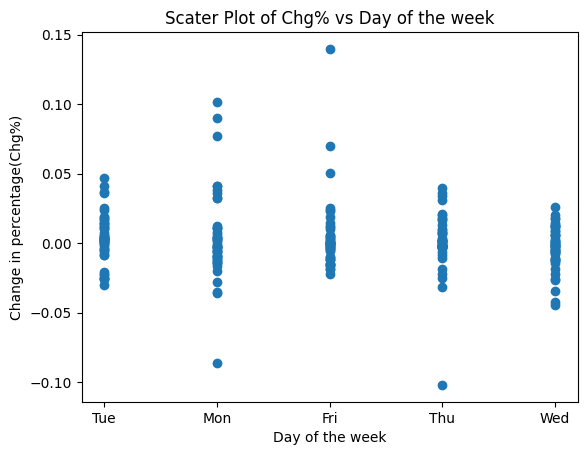

In [ ]:
#A3
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

#Loading IRCTC Stock data
def load_irctc_data(file_path):
    data_frame = pd.read_excel(file_path, sheet_name = "IRCTC Stock Price")
    return data_frame

#Mean and Variance with Numpy
def numpy_mean_variance(data):
    mean_val = np.mean(data)
    variance_val = np.var(data)
    return mean_val,variance_val

#Manual mean
def manual_mean(data):
    total = 0
    for value in data:
        total+= value
    return total/len(data)

#Manual variance
def manual_variance(data):
    mean_val = manual_mean(data)
    total = 0
    for value in data:
        total += (value - mean_val) ** 2
    return total / len(data)

#Time Complexity Measurement
def average_execution_time(func,data,runs = 10):
    total_time = 0
    for _ in range(runs):
        start = time.time()
        func(data)
        end = time.time()
        total_time += (end - start)
    return total_time/runs

#probability of loss over stock
def probability_ofloss(chg_percent):
    losses = list(filter(lambda x :x < 0,chg_percent))
    return len(losses) / len(chg_percent)

def probability_of_data_on_wednesday(data_frame):
    wednesday_data = data_frame[data_frame["Day"] == "Wed"]
    profit_days = wednesday_data[wednesday_data["Chg%"] > 0]
    return len(profit_days) / len(wednesday_data)

def main():
    file_path = "Lab Session Data.xlsx"
    
    irctc_data = load_irctc_data(file_path)
    price = irctc_data["Price"].values
    chg_percent = irctc_data["Chg%"].values
    
    #Mean and Variance
    mean_val,variance_val = numpy_mean_variance(price)
    mean_manual = manual_mean(price)
    var_manual = manual_variance(price)
    
    #Time complexity comaprsison
    time_np = average_execution_time(np.mean, price)
    time_manual = average_execution_time(manual_mean,price)
    
    #Sample means
    wednesday_mean = np.mean(irctc_data[irctc_data["Day"] == "Wed"]["Price"])
    april_mean = np.mean(irctc_data [irctc_data["Month"] == "Apr"]["Price"])
    
    prob_loss = probability_ofloss(chg_percent)    
    prob_profit_wed = probability_of_data_on_wednesday(irctc_data)
    
    print("A3 results")
    print("----------")
    print("Mean Price using Numpy:",mean_val)
    print("Variance using Numpy:",variance_val)
    print("Mean which is done manually:",mean_manual)
    print("Variance e which is done manually:",var_manual)
    print("Average Execution time using Numpy mean:",time_np)
    print("Average Execution time Manually:",time_manual)
    print("Wednesday Mean Price:",wednesday_mean)
    print("April mean price:",april_mean)
    print("Probability of Loss:",prob_loss)
    print("probability of Profit on Wednesday:",prob_profit_wed)
    print("Conditional Probability :",prob_profit_wed)
    
    #Scatter plot
    plt.figure()
    plt.scatter(irctc_data["Day"],irctc_data["Chg%"])
    plt.xlabel("Day of the week")
    plt.ylabel("Change in percentage(Chg%)")
    plt.title("Scater Plot of Chg% vs Day of the week")
    plt.show()
    
if __name__ == "__main__":
    main()

In [ ]:
#A4
import pandas as pd
import numpy as np

def a4_data_exploration(file_path):
    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    # Identify attribute types
    numerical_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(include="object").columns

    # Encoding suggestion for categorical attributes
    encoding_scheme = {}
    for col in categorical_cols:
        encoding_scheme[col] = "One-Hot Encoding (Nominal/Binary)"

    # Range for numerical attributes
    ranges = {col: (df[col].min(), df[col].max()) for col in numerical_cols}

    # Missing values
    missing_values = df.isnull().sum()

    # Outlier detection using IQR
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        count = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
        outliers[col] = count

    # Mean and Variance
    statistics = {col: (np.mean(df[col]), np.var(df[col])) for col in numerical_cols}

    return (
        df.dtypes,
        numerical_cols,
        categorical_cols,
        encoding_scheme,
        ranges,
        missing_values,
        outliers,
        statistics
    )


def main():
    (
        dtypes,
        num_cols,
        cat_cols,
        encoding,
        ranges,
        missing,
        outliers,
        stats
    ) = a4_data_exploration("Lab Session Data.xlsx")

    print("A4 Results")
    print("----------")

    print("\nData Types:")
    print(dtypes)

    print("\nNumerical Attributes:")
    print(list(num_cols))

    print("\nCategorical Attributes:")
    print(list(cat_cols))

    print("\nEncoding Scheme for Categorical Attributes:")
    for k, v in encoding.items():
        print(f"{k}: {v}")

    print("\nMissing Values:")
    print(missing)

    print("\nRanges of Numerical Attributes:")
    print(ranges)

    print("\nOutlier Count (IQR Method):")
    print(outliers)

    print("\nMean & Variance:")
    print(stats)


if __name__ == "__main__":
    main()


A4 Results
----------

Data Types:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          

In [ ]:
#A5
import pandas as pd
import numpy as np

def compute_jc_smc(file_path):
    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    # Take first two observation vectors
    v1 = df.iloc[0]
    v2 = df.iloc[1]

    # Select only binary attributes (0/1)
    binary_cols = [col for col in df.columns if df[col].isin([0, 1]).all()]

    a = v1[binary_cols].values
    b = v2[binary_cols].values

    f11 = np.sum((a == 1) & (b == 1))
    f00 = np.sum((a == 0) & (b == 0))
    f10 = np.sum((a == 1) & (b == 0))
    f01 = np.sum((a == 0) & (b == 1))

    JC = f11 / (f11 + f10 + f01)
    SMC = (f11 + f00) / (f11 + f10 + f01 + f00)

    return JC, SMC, f11, f00, f10, f01


def main():
    JC, SMC, f11, f00, f10, f01 = compute_jc_smc("Lab Session Data.xlsx")

    print("A5 Results")
    print("----------")
    print("f11:", f11)
    print("f00:", f00)
    print("f10:", f10)
    print("f01:", f01)
    print("Jaccard Coefficient (JC):", JC)
    print("Simple Matching Coefficient (SMC):", SMC)

    print("\nComparison:")
    print("JC ignores common absences (0-0 matches).")
    print("SMC considers both presence and absence.")

    print("\nJudgement:")
    print("Jaccard is more appropriate for medical data because presence of conditions (1) is more important than absence (0).")


if __name__ == "__main__":
    main()


A5 Results
----------
f11: 0
f00: 0
f10: 0
f01: 0
Jaccard Coefficient (JC): nan
Simple Matching Coefficient (SMC): nan

Comparison:
JC ignores common absences (0-0 matches).
SMC considers both presence and absence.

Judgement:
Jaccard is more appropriate for medical data because presence of conditions (1) is more important than absence (0).


C:\Users\yuvaa\AppData\Local\Temp\ipykernel_32840\419206948.py:22: RuntimeWarning: invalid value encountered in scalar divide
  JC = f11 / (f11 + f10 + f01)
C:\Users\yuvaa\AppData\Local\Temp\ipykernel_32840\419206948.py:23: RuntimeWarning: invalid value encountered in scalar divide
  SMC = (f11 + f00) / (f11 + f10 + f01 + f00)


In [8]:
#A6
import pandas as pd
import numpy as np
from numpy.linalg import norm

def compute_cosine_similarity(file_path):
    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    # Select numeric columns first (DataFrame)
    numeric_df = df.select_dtypes(include=np.number)

    # Take first two observation vectors
    v1 = numeric_df.iloc[0].values
    v2 = numeric_df.iloc[1].values

    cosine_sim = np.dot(v1, v2) / (norm(v1) * norm(v2))
    return cosine_sim

def main():
    cosine_sim = compute_cosine_similarity("Lab Session Data.xlsx")

    print("A6 Result")
    print("---------")
    print("Cosine Similarity:", cosine_sim)

if __name__ == "__main__":
    main()



A6 Result
---------
Cosine Similarity: 0.9999999999999997


A7 Result
---------
Heatmap of Cosine Similarity (First 20 Observations)


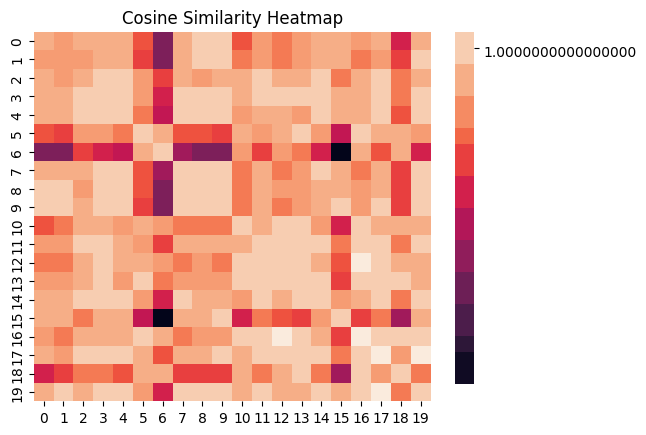

In [10]:
# A7
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm

def cosine_similarity_matrix(file_path):
    # Load data
    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    # Select numeric columns FIRST (DataFrame)
    numeric_df = df.select_dtypes(include=np.number).head(20)

    matrix = np.zeros((20, 20))

    for i in range(20):
        for j in range(20):
            v1 = numeric_df.iloc[i].values
            v2 = numeric_df.iloc[j].values
            matrix[i, j] = np.dot(v1, v2) / (norm(v1) * norm(v2))

    return matrix

def main():
    matrix = cosine_similarity_matrix("Lab Session Data.xlsx")

    print("A7 Result")
    print("---------")
    print("Heatmap of Cosine Similarity (First 20 Observations)")

    sns.heatmap(matrix)
    plt.title("Cosine Similarity Heatmap")
    plt.show()

if __name__ == "__main__":
    main()


In [11]:
# A8
import pandas as pd
import numpy as np

def data_imputation(file_path):
    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(include="object").columns

    # Fill missing values
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)

    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df.isnull().sum()

def main():
    missing_after = data_imputation("Lab Session Data.xlsx")

    print("A8 Result")
    print("---------")
    print("Missing values after imputation:")
    print(missing_after)

if __name__ == "__main__":
    main()


A8 Result
---------
Missing values after imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition        

C:\Users\yuvaa\AppData\Local\Temp\ipykernel_32840\314382949.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\yuvaa\AppData\Local\Temp\ipykernel_32840\314382949.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [12]:
# A9
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def normalize_data(file_path):
    df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

    numerical_cols = df.select_dtypes(include=np.number).columns

    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df[numerical_cols].describe()

def main():
    summary = normalize_data("Lab Session Data.xlsx")

    print("A9 Result")
    print("---------")
    print("Summary of normalized numerical attributes:")
    print(summary)

if __name__ == "__main__":
    main()


A9 Result
---------
Summary of normalized numerical attributes:
         Record ID          age
count  9172.000000  9172.000000
mean      0.414296     0.001107
std       0.258611     0.018069
min       0.000000     0.000000
25%       0.327716     0.000549
50%       0.348012     0.000824
75%       0.679105     0.001023
max       1.000000     1.000000
